In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('database_IND.csv')
df


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(907, 27)

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Data Processing and Feature Engineering

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [4]:
df = df.drop(['country','wepp_id','url','country_long','geolocation_source','name','gppd_idnr'],axis = 1)

In [7]:
df.isnull().sum()

capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [5]:
data = df.copy()
df['latitude'].fillna(df['latitude'].value_counts().idxmax(), inplace=True)
df['longitude'].fillna(df['longitude'].value_counts().idxmax(), inplace=True)
df['other_fuel1'].fillna(df['other_fuel1'].value_counts().idxmax(), inplace=True)
df['other_fuel2'].fillna(df['other_fuel2'].value_counts().idxmax(), inplace=True)
#df['other_fuel3'].fillna(df['other_fuel3'].value_counts().idxmax(), inplace=True)
df['commissioning_year'].fillna(df['commissioning_year'].value_counts().idxmax(), inplace=True)
df['owner'].fillna(df['owner'].value_counts().idxmax(), inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].value_counts().idxmax(), inplace=True)
#df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].value_counts().idxmax(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].value_counts().idxmax(), inplace=True)
#df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].value_counts().idxmax(), inplace=True)
df['generation_data_source'].fillna(df['generation_data_source'].value_counts().idxmax(), inplace=True)
#df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].value_counts().idxmax(), inplace=True)

In [6]:
df.isnull().sum()

capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 907
commissioning_year            0
owner                         0
source                        0
year_of_capacity_data         0
generation_gwh_2013         907
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_gwh_2018           0
generation_gwh_2019         907
generation_data_source        0
estimated_generation_gwh    907
dtype: int64

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,total_generation
count,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.349753,77.172109,2004.594267,5898.386424
std,590.085456,6.114575,4.976401,15.734928,15335.620295
min,0.000000,8.168900,68.644700,1927.000000,0.000000
25%,16.725000,17.072000,73.811550,1998.000000,0.000000
50%,59.200000,22.142100,76.493800,2014.000000,0.000000
75%,385.250000,25.176450,79.206100,2015.000000,3838.334000
max,4760.000000,34.649000,95.408000,2018.000000,156908.000000


In [7]:
df['total_generation'] =df['generation_gwh_2014'] + df['generation_gwh_2015'] + df['generation_gwh_2016'] + df['generation_gwh_2017']+df['generation_gwh_2018']

In [8]:
df = df.drop(['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019'],axis = 1)

In [9]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_data_source,estimated_generation_gwh,total_generation
0,2.5,28.1839,73.2407,Solar,Oil,Oil,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,2019.0,Central Electricity Authority,NaN,0.000000
1,98.0,24.7663,74.6090,Coal,Oil,Oil,NaN,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,2019.0,Central Electricity Authority,NaN,0.000000
2,39.2,21.9038,69.3732,Wind,Oil,Oil,NaN,2015.0,AES,CDM,2019.0,Central Electricity Authority,NaN,0.000000
3,135.0,23.8712,91.3602,Gas,Oil,Oil,NaN,2004.0,Acc Acc ltd,Central Electricity Authority,2019.0,Central Electricity Authority,NaN,3637.554320
4,1800.0,21.9603,82.4091,Coal,Oil,Oil,NaN,2015.0,Acc Acc ltd,Central Electricity Authority,2019.0,Central Electricity Authority,NaN,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Oil,NaN,2016.0,Acc Acc ltd,Central Electricity Authority,2019.0,Central Electricity Authority,NaN,1786.491525
903,3.0,12.8932,78.1654,Solar,Oil,Oil,NaN,2015.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,2019.0,Central Electricity Authority,NaN,0.000000
904,25.5,15.2758,75.5811,Wind,Oil,Oil,NaN,2015.0,Acc Acc ltd,CDM,2019.0,Central Electricity Authority,NaN,0.000000
905,80.0,24.3500,73.7477,Coal,Oil,Oil,NaN,2015.0,Hindustan Zinc ltd,Hindustan Zinc ltd,2019.0,Central Electricity Authority,NaN,0.000000


In [16]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'other_fuel2', 'other_fuel3', 'commissioning_year', 'owner', 'source',
       'year_of_capacity_data', 'generation_data_source',
       'estimated_generation_gwh', 'total_generation'],
      dtype='object')

In [17]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year,total_generation
capacity_mw,1.000000,0.039525,0.215875,-0.004072,0.886256
latitude,0.039525,1.000000,0.007583,0.033037,0.053373
longitude,0.215875,0.007583,1.000000,-0.150742,0.194236
commissioning_year,-0.004072,0.033037,-0.150742,1.000000,-0.046821
total_generation,0.886256,0.053373,0.194236,-0.046821,1.000000


In [10]:
df = df.drop(['other_fuel3'],axis = 1)

In [11]:
df=df.drop(['year_of_capacity_data','estimated_generation_gwh'],axis=1)

We drop this columns beacuse there are no values all are nan values 

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [20]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,generation_data_source,total_generation
0,2.5,28.1839,73.2407,6,2,0,2011.0,229,109,0,0.000000
1,98.0,24.7663,74.6090,1,2,0,2015.0,258,174,0,0.000000
2,39.2,21.9038,69.3732,7,2,0,2015.0,2,21,0,0.000000
3,135.0,23.8712,91.3602,2,2,0,2004.0,5,22,0,3637.554320
4,1800.0,21.9603,82.4091,1,2,0,2015.0,5,22,0,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,0,2016.0,5,22,0,1786.491525
903,3.0,12.8932,78.1654,6,2,0,2015.0,114,77,0,0.000000
904,25.5,15.2758,75.5811,7,2,0,2015.0,5,21,0,0.000000
905,80.0,24.3500,73.7477,1,2,0,2015.0,91,59,0,0.000000


<AxesSubplot:>

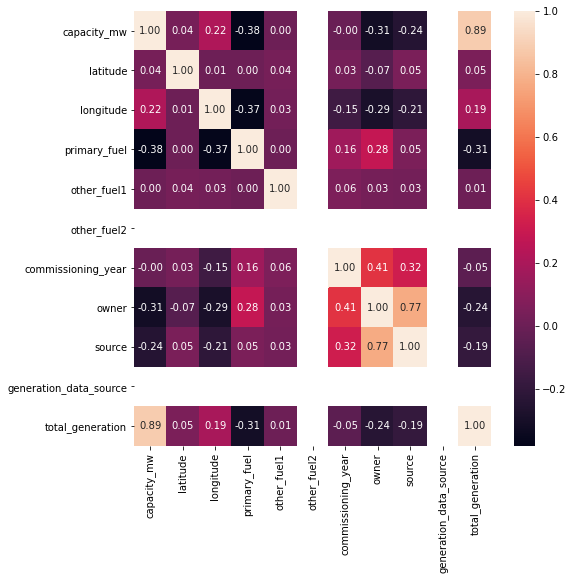

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

# EDA

<AxesSubplot:xlabel='primary_fuel', ylabel='estimated_generation_gwh'>

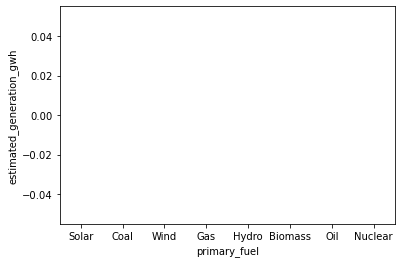

In [9]:
 sns.barplot(x="primary_fuel", y="estimated_generation_gwh", data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

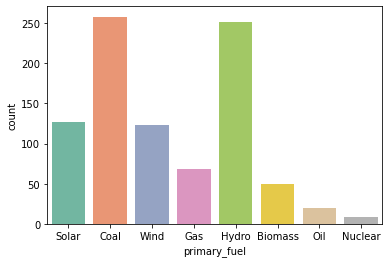

In [10]:
sns.countplot(x='primary_fuel', data=df, palette = 'Set2')

<AxesSubplot:xlabel='commissioning_year', ylabel='count'>

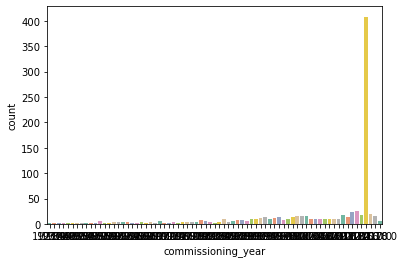

In [11]:
sns.countplot(x='commissioning_year', data=df, palette = 'Set2')

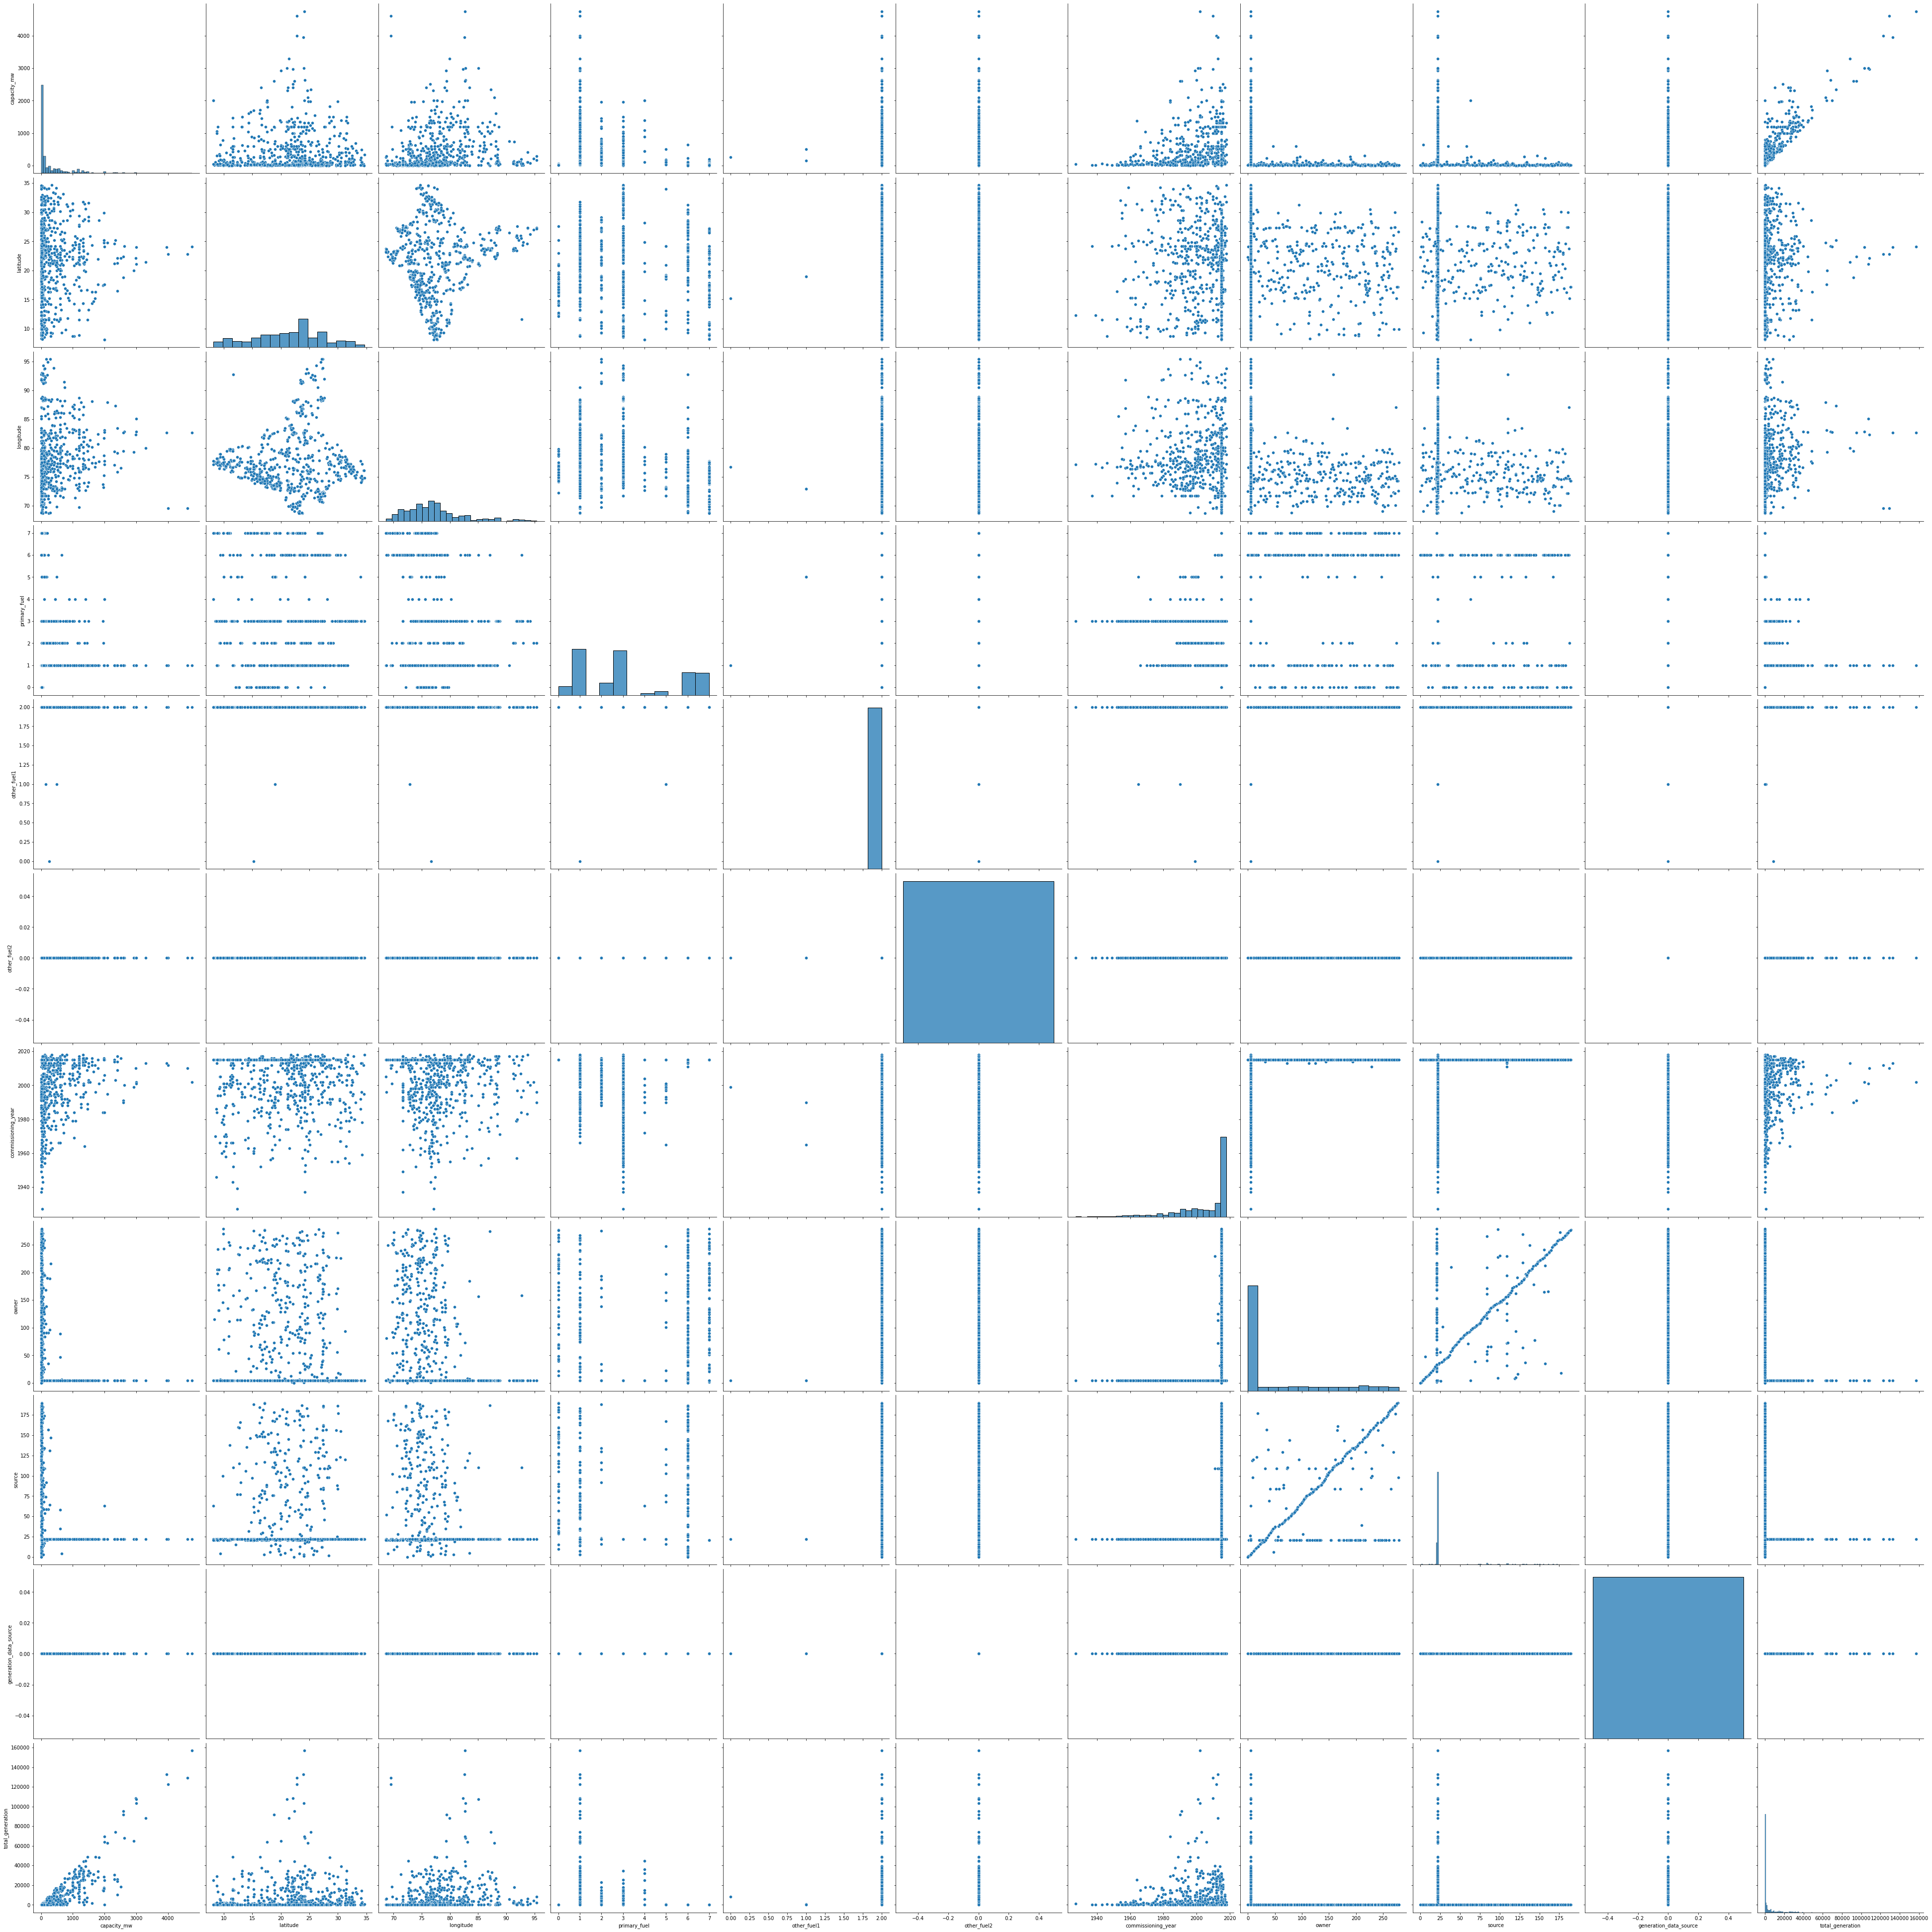

In [22]:
sns.pairplot(df, size=5)
plt.show()

# Skewness checking

In [14]:
x=df.drop('primary_fuel', axis=1)
y=df['primary_fuel']

In [22]:
x

,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,generation_data_source,total_generation
0,2.5,28.1839,73.2407,2,0,2011.0,229,109,0,0.000000
1,98.0,24.7663,74.6090,2,0,2015.0,258,174,0,0.000000
2,39.2,21.9038,69.3732,2,0,2015.0,2,21,0,0.000000
3,135.0,23.8712,91.3602,2,0,2004.0,5,22,0,3637.554320
4,1800.0,21.9603,82.4091,2,0,2015.0,5,22,0,27859.499736
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2,0,2016.0,5,22,0,1786.491525
903,3.0,12.8932,78.1654,2,0,2015.0,114,77,0,0.000000
904,25.5,15.2758,75.5811,2,0,2015.0,5,21,0,0.000000
905,80.0,24.3500,73.7477,2,0,2015.0,91,59,0,0.000000


In [23]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

In [15]:
x.skew()

capacity_mw                3.123576
latitude                  -0.215814
longitude                  1.130252
other_fuel1              -20.453120
other_fuel2                0.000000
commissioning_year        -1.714873
owner                      1.364406
source                     1.827373
generation_data_source     0.000000
total_generation           5.049200
dtype: float64

In [16]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [28]:
type(x_new)

numpy.ndarray

In [29]:
x.columns

Index(['capacity_mw', 'latitude', 'longitude', 'other_fuel1', 'other_fuel2',
       'commissioning_year', 'owner', 'source', 'generation_data_source',
       'total_generation'],
      dtype='object')

In [17]:
x=pd.DataFrame(x_new,columns=x.columns)

In [27]:
x

,capacity_mw,latitude,longitude,other_fuel1,other_fuel2,commissioning_year,owner,source,generation_data_source,total_generation
0,-1.695767,1.134369,-0.826778,0.057607,0.0,0.358184,1.490514,1.582861,0.0,-0.931593
1,0.193694,0.544010,-0.431721,0.057607,0.0,0.743571,1.512380,2.036658,0.0,-0.931593
2,-0.292337,0.061899,-2.231266,0.057607,0.0,0.743571,-1.899629,-0.471879,0.0,-0.931593
3,0.360998,0.391990,2.106598,0.057607,0.0,-0.237119,-0.719375,-0.403248,0.0,1.033641
4,1.649503,0.071298,1.144189,0.057607,0.0,0.743571,-0.719375,-0.403248,0.0,1.351348
...,...,...,...,...,...,...,...,...,...,...
902,1.593509,-0.845417,0.238099,0.057607,0.0,0.845530,-0.719375,-0.403248,0.0,0.909861
903,-1.615576,-1.367415,0.408358,0.057607,0.0,0.743571,1.330190,1.211010,0.0,-0.931593
904,-0.522773,-1.004269,-0.177302,0.057607,0.0,0.743571,-0.719375,-0.471879,0.0,-0.931593
905,0.086915,0.473168,-0.675056,0.057607,0.0,0.743571,1.264218,0.904767,0.0,-0.931593


In [18]:
x.skew()

capacity_mw                0.022164
latitude                  -0.089569
longitude                  0.040507
other_fuel1              -17.330022
other_fuel2                0.000000
commissioning_year        -1.077695
owner                      0.467077
source                    -0.214066
generation_data_source     0.000000
total_generation           0.216412
dtype: float64

In [30]:
sk=x.skew()
sk

capacity_mw                0.022164
latitude                  -0.089569
longitude                  0.040507
other_fuel1              -17.330022
other_fuel2                0.000000
commissioning_year        -1.077695
owner                      0.467077
source                    -0.214066
generation_data_source     0.000000
total_generation           0.216412
dtype: float64

In [31]:
sk[np.abs(sk)>0.5].all()

True

In [32]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(907, 11)

In [33]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  71,  80, 143, 143, 147, 179, 183, 191, 209, 209, 222,
       244, 299, 308, 308, 321, 323, 333, 340, 342, 345, 360, 363, 364,
       364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493, 494,
       494, 499, 519, 538, 541, 573, 577, 583, 601, 621, 638, 648, 648,
       657, 657, 661, 669, 689, 695, 695, 706, 709, 721, 724, 726, 726,
       728, 767, 786, 786, 788, 807, 808, 808, 811, 813, 817, 818, 832,
       848, 870, 871, 879, 880, 880, 895, 900], dtype=int64), array([ 0, 10,  8,  8,  0, 10,  0,  2,  2,  8,  0, 10,  6,  2,  8,  0, 10,
        8,  2,  2,  2,  6,  8,  2,  0,  0, 10,  6,  0,  2,  2,  6,  6,  6,
        0,  6,  0, 10,  0, 10,  2,  2,  6,  6,  6,  2,  6,  6,  6,  2,  0,
       10,  0, 10,  8,  8,  8,  0, 10,  6,  6, 10, 10,  0, 10,  6,  0,  0,
       10,  0,  6,  0, 10,  4,  4,  4,  2,  8,  6,  8,  8,  8,  0, 10,  8,
        8], dtype=int64))


# Model Building

In [19]:
features=df.drop("primary_fuel",axis=1)
target=df["primary_fuel"]

In [20]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [21]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training academy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the training academy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training academy is:-0.3209478814723272
At random state 0, the training academy is:-0.32449230038432386


At random state 1, the training academy is:-0.33632692863409863
At random state 1, the training academy is:-0.2111469080816487


At random state 2, the training academy is:-0.32546352164611236
At random state 2, the training academy is:-0.29273722371421507


At random state 3, the training academy is:-0.31505604860144487
At random state 3, the training academy is:-0.34813778118770855


At random state 4, the training academy is:-0.349441526085849
At random state 4, the training academy is:-0.20305243409936202


At random state 5, the training academy is:-0.32115741657582486
At random state 5, the training academy is:-0.29955465097794265


At random state 6, the training academy is:-0.34914462605283614
At random state 6, the training academy is:-0.1942670401044736


At random state 7, the training academy is:-0.32950471186604013
At random state 7, the training

In [38]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=835)

In [39]:
lr.fit(features_train,target_train)

LinearRegression()

In [40]:
pred_test=lr.predict(features_test)

In [41]:
print(r2_score(target_test,pred_test))

0.32082414457813535


In [42]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.28011265245895584 and accuracy score for training is -0.3332220955252523and accuracy for the testing is 0.32082414457813535


At cross fold3 the cv score is 0.2825363064455593 and accuracy score for training is -0.3332220955252523and accuracy for the testing is 0.32082414457813535


At cross fold4 the cv score is 0.2939769463342188 and accuracy score for training is -0.3332220955252523and accuracy for the testing is 0.32082414457813535


At cross fold5 the cv score is 0.29077732767619696 and accuracy score for training is -0.3332220955252523and accuracy for the testing is 0.32082414457813535


At cross fold6 the cv score is 0.2873523543515169 and accuracy score for training is -0.3332220955252523and accuracy for the testing is 0.32082414457813535


At cross fold7 the cv score is 0.2837950967806289 and accuracy score for training is -0.3332220955252523and accuracy for the testing is 0.32082414457813535


At cross fold8 the cv score is 0.2876290824954658 

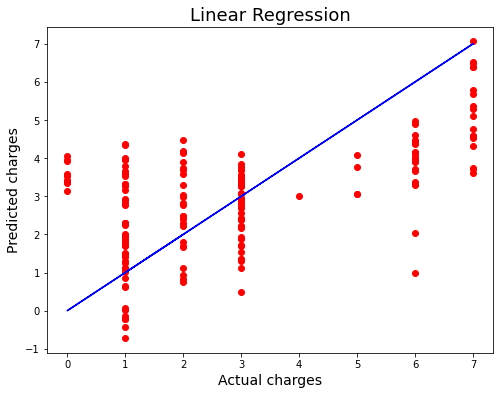

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Cross validation score

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.linear_model import Lasso
parameters={'alpha': [.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [46]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.32070949172422747

In [47]:
cv_score=cross_val_score(ls,features,target,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.29396235029450046

# Hyper parameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [49]:
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=4)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 79.92227076449385
Cross Val Score: 79.23022437537156


Random Forest accuracy is best so we choose this model

In [50]:
import pickle
filename='globalplant .pkl'
pickle.dump(rf,open(filename,'wb'))

# Model Building for capacity_mw

In [22]:
features=df.drop("capacity_mw",axis=1)
target=df["capacity_mw"]

In [23]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the training academy is:-{r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the training academy is:-{r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the training academy is:-0.7899506795002936
At random state 0, the training academy is:-0.8771248372531301


At random state 1, the training academy is:-0.819172429702254
At random state 1, the training academy is:-0.7769994344880091


At random state 2, the training academy is:-0.8163998349457046
At random state 2, the training academy is:-0.8013049314037786


At random state 3, the training academy is:-0.8153488384689952
At random state 3, the training academy is:-0.807938680050326


At random state 4, the training academy is:-0.804186508895429
At random state 4, the training academy is:-0.8498082437410579


At random state 5, the training academy is:-0.8221380196389678
At random state 5, the training academy is:-0.7732469862179838


At random state 6, the training academy is:-0.818789383049985
At random state 6, the training academy is:-0.7913585685628772


At random state 7, the training academy is:-0.8263803970447653
At random state 7, the training academy is:-0

In [24]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=19)

In [25]:
lr.fit(features_train,target_train)

LinearRegression()

In [26]:
pred_test=lr.predict(features_test)

In [27]:
print(r2_score(target_test,pred_test))

0.8123211375982633


In [28]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold{j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy}and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold2 the cv score is 0.7772957836197435 and accuracy score for training is -0.9159476375050364and accuracy for the testing is 0.8123211375982633


At cross fold3 the cv score is 0.7981310836414424 and accuracy score for training is -0.9159476375050364and accuracy for the testing is 0.8123211375982633


At cross fold4 the cv score is 0.7938436345493591 and accuracy score for training is -0.9159476375050364and accuracy for the testing is 0.8123211375982633


At cross fold5 the cv score is 0.8062264144416424 and accuracy score for training is -0.9159476375050364and accuracy for the testing is 0.8123211375982633


At cross fold6 the cv score is 0.8012071495952294 and accuracy score for training is -0.9159476375050364and accuracy for the testing is 0.8123211375982633


At cross fold7 the cv score is 0.8013335453580562 and accuracy score for training is -0.9159476375050364and accuracy for the testing is 0.8123211375982633


At cross fold8 the cv score is 0.8054253210440372 and accu

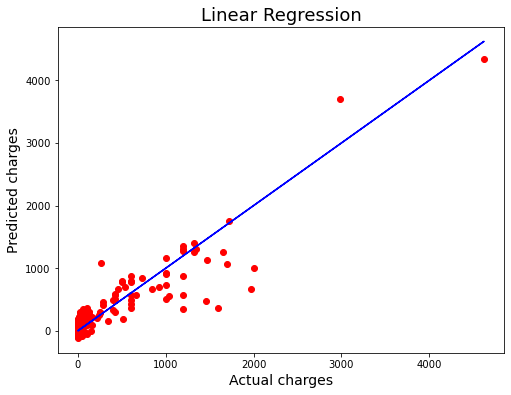

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='r')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.linear_model import Lasso
parameters={'alpha': [.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [32]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.8123230836283531

In [33]:
cv_score=cross_val_score(ls,features,target,cv=8)
cv_mean=cv_score.mean()
cv_mean

0.8054253255446512

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [35]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)
rfscore=cross_val_score(rf,features,target,cv=8)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 86.69352131048547
Cross Val Score: 85.0034685467607


In [36]:
import pickle
filename='globalplant1 .pkl'
pickle.dump(rf,open(filename,'wb'))